In [41]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Leitura do CSV e setando como Time
df = pd.read_csv('FT02_18_19.csv',delimiter=';', parse_dates=True)
df['Time'] = pd.to_datetime(df.Time)
df = df[df['Time'].notna()]
df = df.set_index('Time')
df = df.resample("D").last()

In [43]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.50)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()



In [44]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(trend='c', disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=109.490358, expected=97.800000
predicted=107.092741, expected=119.380000
predicted=109.745437, expected=123.570000
predicted=115.235934, expected=127.130000
predicted=120.465406, expected=125.370000
predicted=119.426175, expected=91.460000
predicted=109.746499, expected=117.640000
predicted=110.882899, expected=112.830000
predicted=116.704517, expected=99.600000
predicted=113.292496, expected=118.530000
predicted=107.875988, expected=116.700000
predicted=113.221598, expected=120.370000
predicted=117.873993, expected=115.340000
predicted=113.772536, expected=112.820000
predicted=113.550014, expected=120.900000
predicted=116.920735, expected=112.510000
predicted=117.101524, expected=110.090000
predicted=113.761345, expected=117.110000
predicted=113.468241, expected=111.130000
predicted=114.926927, expected=96.440000
predicted=108.107653, expected=110.990000
predicted=106.236371, expected=127.050000
predicted=116.232464, expected=119.080000
predicted=119.748445, expected=108.110

RMSE é: 9.144
MSE é: 83.621
MAPE é: 0.064


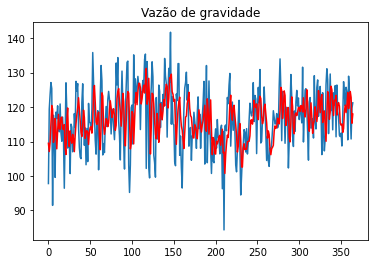

In [47]:
# evaluate forecasts
RMSE = sqrt(mean_squared_error(test, predictions))
MSE = mean_squared_error(test, predictions)
MAPE = mean_absolute_percentage_error(test, predictions)
print("RMSE é: %.3f" %RMSE)
print("MSE é: %.3f" %MSE)
print("MAPE é: %.3f" %MAPE)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Vazão de gravidade')
plt.show()


In [46]:
# ----------- Analisar os resíduos ------------ pra ver se existem tendencias ou sazonalidades ainda
#Erro residual = Valor esperado - valor predito

# Erros residuais
residuals = [test[i] - predictions[i] for i in range(len(test))]

# Converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

# imprime as 5 primeiras linhas, a descrição e plota
residuals.head()
residuals.describe()
#residuals.plot()



,0
count,365.000000
mean,0.058597
std,9.156815
min,-29.039329
25%,-6.042030
50%,1.093146
75%,6.613317
max,25.828293
